In [6]:
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
from random import uniform
import datetime


In [2]:
def newpoint():
   return uniform(-180,180), uniform(-90, 90)

coord = (newpoint() for x in range(5000))

coordinates=[]
for coord in coord:
    coordinates.append(coord)
    
cities_original=[]
for coordinate_pair in coordinates:
    lat, lon= coordinate_pair
    cities_original.append(citipy.nearest_city(lat, lon).city_name)
    
cities=set(cities_original)
print(f'Numbers of unique cities used for data retrieving is {len(cities)}')


Numbers of unique cities used for data retrieving is 904


In [3]:
url='http://api.openweathermap.org/data/2.5/weather?'

unit='imperial'

query_url=f'{url}&appid={api_key}&unit={unit}&q='

lat=[]
long=[]
temp_max=[]
hum=[]
cld=[]
wind=[]
cit=[]
country=[]
datetime=[]
nums= 1

for city in cities:
    response_json=requests.get(query_url+city).json()
    if str(response_json['cod'])=='404':
        print(f'Missing data city no. {nums} of {len(cities)}|Skipped {city}')
        nums=nums + 1
    if str(response_json['cod'])!='404':
        try:
            cit.append(city)
            lat.append(response_json['coord']['lat'])
            print(f'Retrieve data city no. {nums} of {len(cities)}|Added {city}')
            nums=nums+1
        except:
            print('NA')
        try:
            long.append(response_json['coord']['lon'])
        except:
            print('NA')
        try:
            temp_max.append(response_json['main']['temp_max'])
        except:
            print('NA0')
        try:
            hum.append(response_json['main']['humidity'])
        except:
            print('NA1')
        try:
            cld.append(response_json['clouds']['all'])
        except:
            print('NA2')
        try:
            wind.append(response_json['wind']['speed'])
        except:
            print('NA3')
        try:
            country.append(response_json['sys']['country'])
        except:
            print('NA4')
        try:
            datetime.append(response_json['timezone'])
        except:
            print('NA5')

Retrieve data city no. 1 of 904|Added ostrovnoy
Retrieve data city no. 2 of 904|Added asha
Retrieve data city no. 3 of 904|Added montes altos
Missing data city no. 4 of 904|Skipped lovec
Retrieve data city no. 5 of 904|Added grenada
Retrieve data city no. 6 of 904|Added farah
Retrieve data city no. 7 of 904|Added kibala
Retrieve data city no. 8 of 904|Added northampton
Retrieve data city no. 9 of 904|Added harnosand
Retrieve data city no. 10 of 904|Added jalu
Retrieve data city no. 11 of 904|Added sinnamary
Missing data city no. 12 of 904|Skipped kismayo
Retrieve data city no. 13 of 904|Added lalsk
Retrieve data city no. 14 of 904|Added nsanje
Retrieve data city no. 15 of 904|Added san ramon de la nueva oran
Retrieve data city no. 16 of 904|Added ambilobe
Retrieve data city no. 17 of 904|Added san ramon
Retrieve data city no. 18 of 904|Added axim
Retrieve data city no. 19 of 904|Added saint-francois
Retrieve data city no. 20 of 904|Added nuuk
Retrieve data city no. 21 of 904|Added bati

In [4]:
weather_data=pd.DataFrame()
weather_dict={
    'City': cit,
    'Latitude': lat,
    'Longitude': long,
    'Max Temperature': temp_max,
    'Humidity': hum,
    'Cloudiness': cld,
    'Wind Speed': wind,
    'City Country': country,
    'City Datetime': datetime
}
weather_data=pd.DataFrame(weather_dict)
weather_data.to_csv('PyWeatherTable.csv',index=False)
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,City Country,City Datetime
0,ostrovnoy,68.05,39.51,285.50,88,0,4.30,RU,10800
1,asha,54.99,57.29,279.90,93,100,3.67,RU,18000
2,montes altos,-5.83,-47.07,308.15,39,75,2.10,BR,-10800
3,grenada,33.77,-89.81,303.15,51,1,2.60,US,-18000
4,farah,32.37,62.11,300.20,22,0,4.83,AF,16200
...,...,...,...,...,...,...,...,...,...
799,agadez,16.97,7.99,300.15,83,40,2.10,NE,3600
800,tuntum,-5.26,-44.64,311.60,17,53,2.61,BR,-10800
801,ayorou,14.73,0.92,306.30,39,23,1.99,NE,3600
802,chongwe,-15.33,28.68,294.40,34,18,3.12,ZM,7200


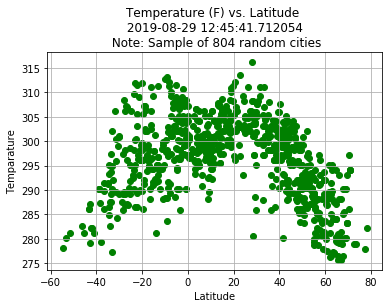

In [7]:
total_cities=len(weather_data['City'])
timestamp=datetime.datetime.today()

plt.figure(0)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Max Temperature'],c='green',
           marker='o')
timestamp=datetime.datetime.today()
plt.title(f'Temperature (F) vs. Latitude \n {timestamp} \n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Temparature')
plt.grid()
plt.savefig('TempvsLat.png')
plt.show()

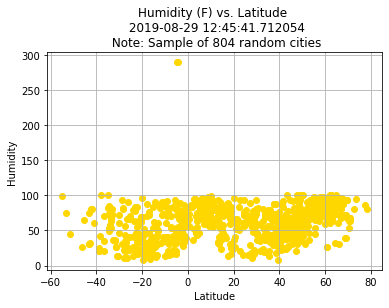

In [9]:
plt.figure(1)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Humidity'],c='gold',
           marker='o')
plt.title(f'Humidity (F) vs. Latitude \n {timestamp}\n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('HumidvsLat.png')
plt.show()

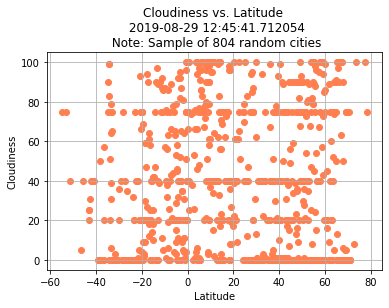

In [10]:
plt.figure(2)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Cloudiness'],c='coral',
           marker='o')
plt.title(f'Cloudiness vs. Latitude \n {timestamp}\n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('CloudvsLat.png')
plt.show()

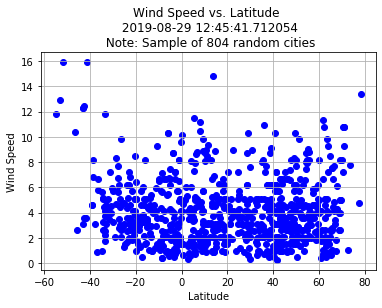

In [11]:
plt.figure(3)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Wind Speed'],c='blue',
           marker='o')
plt.title(f'Wind Speed vs. Latitude \n {timestamp}\n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('WindvsLat.png')
plt.show()